Classification of Handwritten digits images that represent single digit

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

MNIST

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(X_train, y_train),(X_test,y_test) = mnist.load_data('D:/git/DeepLearning/CNN/dataset/mnist.npz')

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

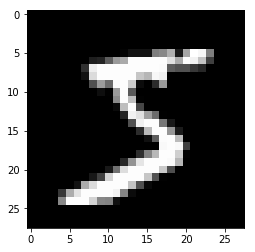

In [8]:
plt.imshow(X_train[0],cmap='gray')

In [9]:
#reshape to get 2d object array
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [10]:
X_train.shape

(60000, 784)

In [11]:
#converting values 0 to 255 to b/e 0 to 1 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [12]:
X_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [13]:
from keras.utils.np_utils import to_categorical

In [14]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [15]:
y_train[0]

5

In [16]:
# value 1 for the digit 5. others are 0
y_train_cat[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [17]:
#10 categories from digit 0-9
y_train_cat.shape

(60000, 10)

In [18]:
y_test_cat.shape

(10000, 10)

Fully connected model to classify images

In [19]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512,input_dim =28*28,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [20]:
h = model.fit(X_train,y_train_cat,batch_size=128,epochs=10,verbose=1,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 20s 466us/step - loss: 0.3210 - acc: 0.9013 - val_loss: 0.1681 - val_acc: 0.9518
Epoch 2/10
42000/42000 [==============================] - 14s 326us/step - loss: 0.1100 - acc: 0.9667 - val_loss: 0.1153 - val_acc: 0.9662
Epoch 3/10
42000/42000 [==============================] - 13s 304us/step - loss: 0.0716 - acc: 0.9785 - val_loss: 0.1205 - val_acc: 0.9662
Epoch 4/10
42000/42000 [==============================] - 13s 311us/step - loss: 0.0534 - acc: 0.9835 - val_loss: 0.1132 - val_acc: 0.9682
Epoch 5/10
42000/42000 [==============================] - 13s 309us/step - loss: 0.0406 - acc: 0.9873 - val_loss: 0.1201 - val_acc: 0.9704
Epoch 6/10
42000/42000 [==============================] - 13s 303us/step - loss: 0.0309 - acc: 0.9902 - val_loss: 0.1107 - val_acc: 0.9757
Epoch 7/10
42000/42000 [==============================] - 13s 312us/step - loss: 0.0259 - acc: 0.9915 - val_loss: 0.

Text(0.5,0,'Epochs')

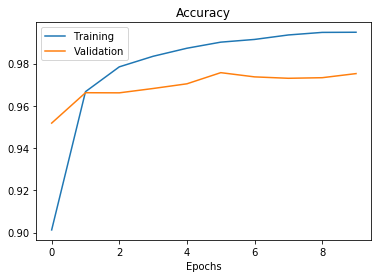

In [21]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')
#overfitting since train accuracy > validation accuracy

In [22]:
test_accuracy = model.evaluate(X_test,y_test_cat)[1]
test_accuracy

10000/10000 [==============================] - 4s 356us/step


0.97619999999999996

Tensor Math

In [23]:
#random integers from 0 to 9
#1st axis ,outermost : 2 objects
#2nd axis : 3 objects
#3rd axis : 4 objects
#4th axis, innermost : 5 objects

A = np.random.randint(10,size=(2, 3, 4, 5))
B = np.random.randint(10,size=(2, 3))

In [24]:
A

array([[[[7, 6, 9, 5, 8],
         [5, 4, 4, 6, 7],
         [4, 9, 4, 3, 0],
         [0, 1, 3, 5, 4]],

        [[2, 2, 4, 0, 8],
         [4, 6, 4, 1, 5],
         [3, 3, 7, 9, 9],
         [0, 6, 0, 6, 7]],

        [[3, 4, 8, 7, 7],
         [3, 0, 4, 7, 5],
         [5, 9, 3, 5, 7],
         [1, 8, 5, 9, 2]]],


       [[[3, 9, 9, 4, 5],
         [7, 0, 0, 0, 7],
         [6, 1, 3, 1, 9],
         [4, 1, 4, 8, 3]],

        [[4, 5, 6, 3, 0],
         [0, 9, 1, 1, 3],
         [5, 9, 3, 0, 7],
         [0, 1, 6, 8, 8]],

        [[2, 1, 8, 7, 4],
         [5, 2, 1, 9, 2],
         [1, 0, 2, 9, 0],
         [8, 4, 6, 1, 2]]]])

In [25]:
A[0,1,0,3]

0

In [26]:
A[0,0,0,0]

7

In [27]:
A[1,1,1,1]

9

In [28]:
B

array([[5, 2, 0],
       [7, 5, 0]])

Random Colored Image

coloredimg as order 3 tensor wih r,g,b values

In [29]:
img = np.random.randint(255, size=(4, 4, 3), dtype='uint8')
img

array([[[ 24, 215, 237],
        [ 53, 165, 123],
        [ 12, 195, 121],
        [188, 162,  81]],

       [[140, 127, 232],
        [130, 109, 194],
        [ 70, 106, 223],
        [133,  38, 133]],

       [[ 29, 134, 123],
        [ 73,  24, 202],
        [122, 243,   0],
        [ 34,  30,  47]],

       [[120, 181,  54],
        [216, 239,  36],
        [178,   9, 196],
        [180, 232,  44]]], dtype=uint8)

Text(0.5,1,'Blue channel')

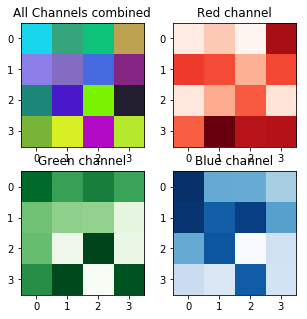

In [30]:
plt.figure(figsize=(5, 5))
plt.subplot(221)
plt.imshow(img)
plt.title("All Channels combined")

plt.subplot(222)
plt.imshow(img[:, : , 0], cmap='Reds')
plt.title("Red channel")

plt.subplot(223)
plt.imshow(img[:, : , 1], cmap='Greens')
plt.title("Green channel")

plt.subplot(224)
plt.imshow(img[:, : , 2], cmap='Blues')
plt.title("Blue channel")

Tensor operations

In [31]:
2*A

array([[[[14, 12, 18, 10, 16],
         [10,  8,  8, 12, 14],
         [ 8, 18,  8,  6,  0],
         [ 0,  2,  6, 10,  8]],

        [[ 4,  4,  8,  0, 16],
         [ 8, 12,  8,  2, 10],
         [ 6,  6, 14, 18, 18],
         [ 0, 12,  0, 12, 14]],

        [[ 6,  8, 16, 14, 14],
         [ 6,  0,  8, 14, 10],
         [10, 18,  6, 10, 14],
         [ 2, 16, 10, 18,  4]]],


       [[[ 6, 18, 18,  8, 10],
         [14,  0,  0,  0, 14],
         [12,  2,  6,  2, 18],
         [ 8,  2,  8, 16,  6]],

        [[ 8, 10, 12,  6,  0],
         [ 0, 18,  2,  2,  6],
         [10, 18,  6,  0, 14],
         [ 0,  2, 12, 16, 16]],

        [[ 4,  2, 16, 14,  8],
         [10,  4,  2, 18,  4],
         [ 2,  0,  4, 18,  0],
         [16,  8, 12,  2,  4]]]])

In [32]:
A+A

array([[[[14, 12, 18, 10, 16],
         [10,  8,  8, 12, 14],
         [ 8, 18,  8,  6,  0],
         [ 0,  2,  6, 10,  8]],

        [[ 4,  4,  8,  0, 16],
         [ 8, 12,  8,  2, 10],
         [ 6,  6, 14, 18, 18],
         [ 0, 12,  0, 12, 14]],

        [[ 6,  8, 16, 14, 14],
         [ 6,  0,  8, 14, 10],
         [10, 18,  6, 10, 14],
         [ 2, 16, 10, 18,  4]]],


       [[[ 6, 18, 18,  8, 10],
         [14,  0,  0,  0, 14],
         [12,  2,  6,  2, 18],
         [ 8,  2,  8, 16,  6]],

        [[ 8, 10, 12,  6,  0],
         [ 0, 18,  2,  2,  6],
         [10, 18,  6,  0, 14],
         [ 0,  2, 12, 16, 16]],

        [[ 4,  2, 16, 14,  8],
         [10,  4,  2, 18,  4],
         [ 2,  0,  4, 18,  0],
         [16,  8, 12,  2,  4]]]])

In [33]:
A.shape

(2, 3, 4, 5)

In [34]:
B.shape

(2, 3)

In [35]:
np.tensordot(A, B, axes=([0, 1], [0, 1]))

array([[ 80, 122, 146,  68,  91],
       [ 82,  77,  33,  37, 109],
       [ 93, 103,  70,  40, 116],
       [ 28,  29,  73, 133,  95]])

In [36]:
np.tensordot(A, B, axes=([0, 1], [0, 1])).shape

(4, 5)

In [37]:
np.tensordot(A, B, axes=([0], [0]))

array([[[[ 56,  29,   0],
         [ 93,  57,   0],
         [108,  63,   0],
         [ 53,  30,   0],
         [ 75,  41,   0]],

        [[ 74,  45,   0],
         [ 20,   8,   0],
         [ 20,   8,   0],
         [ 30,  12,   0],
         [ 84,  49,   0]],

        [[ 62,  38,   0],
         [ 52,  23,   0],
         [ 41,  23,   0],
         [ 22,  11,   0],
         [ 63,  45,   0]],

        [[ 28,  20,   0],
         [ 12,   7,   0],
         [ 43,  26,   0],
         [ 81,  50,   0],
         [ 41,  23,   0]]],


       [[[ 38,  24,   0],
         [ 45,  29,   0],
         [ 62,  38,   0],
         [ 21,  15,   0],
         [ 40,  16,   0]],

        [[ 20,   8,   0],
         [ 93,  57,   0],
         [ 27,  13,   0],
         [ 12,   7,   0],
         [ 46,  25,   0]],

        [[ 50,  31,   0],
         [ 78,  51,   0],
         [ 56,  29,   0],
         [ 45,  18,   0],
         [ 94,  53,   0]],

        [[  0,   0,   0],
         [ 37,  17,   0],
         [ 42,  30,   

In [38]:
np.tensordot(A, B, axes=([0], [0])).shape

(3, 4, 5, 3)

1D convolution

![title](img/discrete convolution.jpg)

In [39]:
a = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype='float32')

In [40]:
b = np.array([-1, 1], dtype='float32')

In [41]:
c = np.convolve(a, b)

In [42]:
a

array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.], dtype=float32)

In [43]:
a.shape

(15,)

In [44]:
b

array([-1.,  1.], dtype=float32)

In [45]:
b.shape

(2,)

In [46]:
c

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.], dtype=float32)

In [47]:
c.shape

(16,)

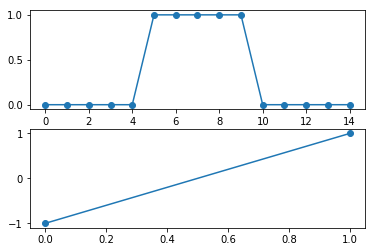

In [48]:
plt.subplot(211)
plt.plot(a, 'o-')

plt.subplot(212)
plt.plot(b, 'o-')

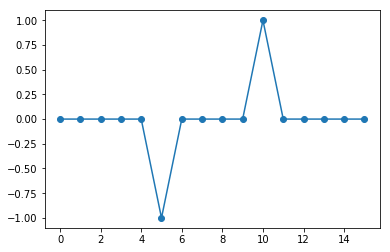

In [49]:
plt.plot(c, 'o-')

2D convolution

0.55 is the degree of matching with convolution filter
![title](img/2d convolution.jpg)

Image filters with convolutions

In [50]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [51]:
img = misc.ascent()

In [52]:
img.shape

(512, 512)

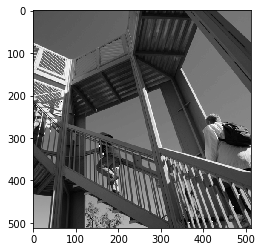

In [53]:
plt.imshow(img, cmap='gray')

In [54]:
#here we input kernel, but in cnn, these weights ll be found by network.
h_kernel = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])

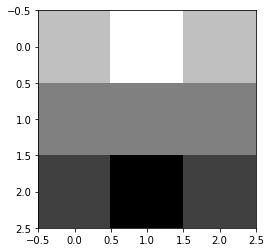

In [55]:
plt.imshow(h_kernel, cmap='gray')

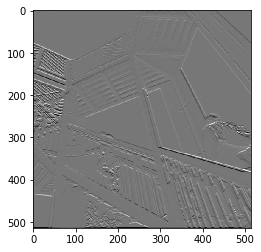

In [56]:
res = convolve2d(img, h_kernel)

plt.imshow(res, cmap='gray')
#some horizontal parts of img is highlighted, vertical is suppressed

Convolutional neural networks

input: 4 order tensor 
(N,H,W,C)
- N- no.of img
- H- height
- W- width
- C- no.of color channels

conv: 4 order tensor 
(Hf, Wf, Ci,Co)
- Hf- height of filter patch
- Wf- width of filter patch
- Ci- no.of color channels in input
- Co- no.of color channels in output filters

![title](img/convolution layer.jpg)

Convolution strides
![title](img/conv strides.jpg)

Convolution padding : preserves the img size
![title](img/conv padding.jpg)



In [57]:
from keras.layers import Conv2D

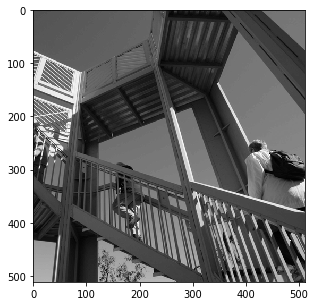

In [58]:
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')

In [59]:
img

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ..., 
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [60]:
img.shape

(512, 512)

In [61]:
#reshaping to 4 order tensor
img_tensor = img.reshape((1, 512, 512, 1))

In [62]:
img_tensor

array([[[[ 83],
         [ 83],
         [ 83],
         ..., 
         [117],
         [117],
         [117]],

        [[ 82],
         [ 82],
         [ 83],
         ..., 
         [117],
         [117],
         [117]],

        [[ 80],
         [ 81],
         [ 83],
         ..., 
         [117],
         [117],
         [117]],

        ..., 
        [[178],
         [178],
         [178],
         ..., 
         [ 57],
         [ 59],
         [ 57]],

        [[178],
         [178],
         [178],
         ..., 
         [ 56],
         [ 57],
         [ 57]],

        [[178],
         [178],
         [178],
         ..., 
         [ 57],
         [ 57],
         [ 58]]]])

In [63]:
# 1 convolutional layer, (3,3) kernel
model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2,1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [64]:
img_pred_tensor = model.predict(img_tensor)

In [65]:
img_pred_tensor.shape

(1, 255, 510, 1)

In [66]:
img_pred = img_pred_tensor[0, :, :, 0]

In [67]:
img_pred.shape

(255, 510)

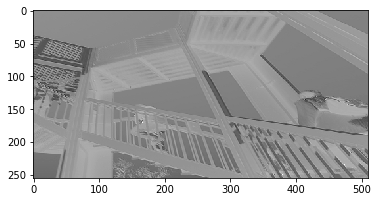

In [68]:
plt.imshow(img_pred, cmap='gray')

In [69]:
weights = model.get_weights()

In [70]:
weights[0].shape

(3, 3, 1, 1)

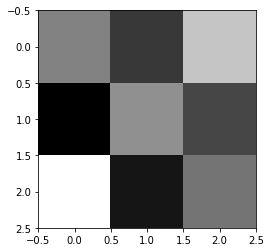

In [71]:
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

In [72]:
#new filter with all ones
weights[0] = np.ones(weights[0].shape)

In [73]:
model.set_weights(weights)

In [74]:
img_pred_tensor = model.predict(img_tensor)

In [75]:
img_pred = img_pred_tensor[0,:,:,0]

In [76]:
img_pred.shape

(255, 510)

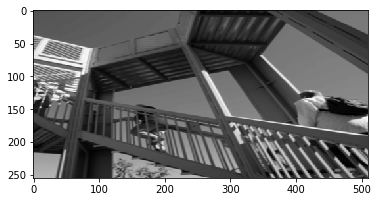

In [77]:
plt.imshow(img_pred,cmap='gray')

In [78]:
# img ll be padded with 0, so we wont loose the px on border
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)

img_pred_tensor.shape

(1, 512, 512, 1)

In [79]:
img_pred = img_pred_tensor[0,:,:,0]
img_pred.shape

(512, 512)

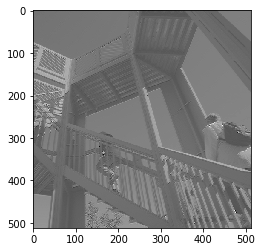

In [80]:
plt.imshow(img_pred,cmap='gray')

Pooling layers

max pool:
maximum value is alone kept no overlapping so that img size is reduced, preserving info about good matches
![title](img/max pool.jpg)

In [81]:
from keras.layers import MaxPool2D, AvgPool2D

In [82]:
model = Sequential()
model.add(MaxPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [83]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

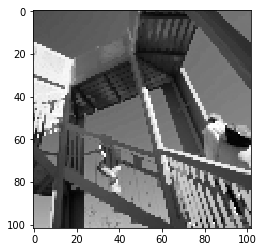

In [84]:
plt.imshow(img_pred, cmap='gray')

In [85]:
model = Sequential()
model.add(AvgPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

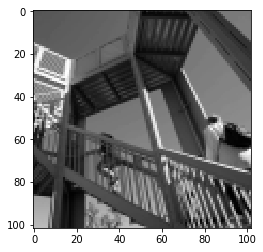

In [86]:
img_pred = model.predict(img_tensor)[0, :, :, 0]
plt.imshow(img_pred, cmap='gray')

Final architecture: cnn
![title](img/cnn.jpg)

In [87]:
X_train.shape

(60000, 784)

In [93]:
#reshape 4 order tensor
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [89]:
X_train.shape

(60000, 28, 28, 1)

In [90]:
from keras.layers import Flatten, Activation

In [91]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [92]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 49s 1ms/step - loss: 0.2675 - acc: 0.9195 - val_loss: 0.1176 - val_acc: 0.9646
Epoch 2/2
42000/42000 [==============================] - 52s 1ms/step - loss: 0.0816 - acc: 0.9754 - val_loss: 0.0838 - val_acc: 0.9742


In [95]:
model.evaluate(X_test, y_test_cat)

10000/10000 [==============================] - 8s 770us/step


[0.066346528983861203, 0.97760000000000002]